<a href="https://colab.research.google.com/github/Campeone/CNN-Facial-Emotion-Detection/blob/main/Facial_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### READ IN THE IMAGES FILE PATH INTO A DATAFRAME

In [ ]:
import pandas as pd

In [ ]:
import os

def read_images_in_folders(root_folder):
    data = {'Emotion': [], 'Image_list': []}


    for foldername, subfolders, filenames in os.walk(root_folder):
        for filename in filenames:
            # Assuming the images are in common formats like JPEG, PNG, etc.
            if filename.lower().endswith(('.png')):
                image_path = os.path.join(foldername, filename)
                emotion_class = os.path.relpath(foldername, root_folder)
                data['Image_list'].append(image_path)
                data['Emotion'].append(emotion_class)

    return pd.DataFrame(data)

#### Training Data

In [ ]:
train_root_folder = '/content/drive/MyDrive/Facial Emotion/train'
train_images_csv = read_images_in_folders(train_root_folder)

In [ ]:
train_images_csv.sample(5)

,Emotion,Image_list
8188,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
16101,neutral,/content/drive/MyDrive/Facial Emotion/train/ne...
18574,neutral,/content/drive/MyDrive/Facial Emotion/train/ne...
5544,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
11767,happy,/content/drive/MyDrive/Facial Emotion/train/ha...


<Axes: >

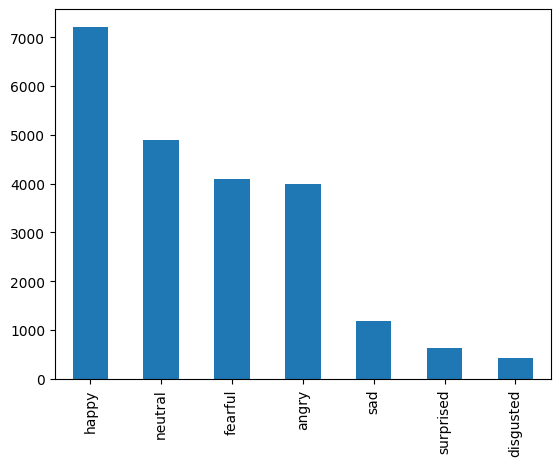

In [ ]:
train_images_csv['Emotion'].value_counts().plot(kind='bar', x='Category', y='Values')

In [ ]:
train_images_csv['Emotion'].value_counts()

happy        7215
neutral      4897
fearful      4097
angry        3995
sad          1185
surprised     630
disgusted     436
Name: Emotion, dtype: int64

In [ ]:
train_images_csv[4430:4440]

,Emotion,Image_list
4430,disgusted,/content/drive/MyDrive/Facial Emotion/train/di...
4431,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4432,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4433,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4434,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4435,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4436,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4437,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4438,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4439,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...


In [ ]:
train_images_csv.head()

,Emotion,Image_list
0,angry,/content/drive/MyDrive/Facial Emotion/train/an...
1,angry,/content/drive/MyDrive/Facial Emotion/train/an...
2,angry,/content/drive/MyDrive/Facial Emotion/train/an...
3,angry,/content/drive/MyDrive/Facial Emotion/train/an...
4,angry,/content/drive/MyDrive/Facial Emotion/train/an...


In [ ]:
train_list = train_images_csv['Image_list'].tolist()

In [ ]:
len(train_list)

22455

In [ ]:
trainsup = train_images_csv[train_images_csv['Emotion'] == 'surprised']

In [ ]:
trainsup

,Emotion,Image_list
20640,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
20641,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
20642,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
20643,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
20644,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
...,...,...
21265,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
21266,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
21267,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
21268,surprised,/content/drive/MyDrive/Facial Emotion/train/su...


In [ ]:
train_sup_list = trainsup['Image_list'].tolist()

In [ ]:
len(train_images_csv)

22455

There are 22455 images distributed across 6 different classes of facial emotions.

In [ ]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def images_to_tensors2(root_dir, target_size=(48, 48)):
    tensors = [
        np.expand_dims(img_to_array(load_img(os.path.join(root_dir, folder, file), color_mode='grayscale', target_size=target_size)), axis=0)
        for folder in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, folder))
        for file in os.listdir(os.path.join(root_dir, folder)) if file.endswith('.png')
    ]
    return np.concatenate(tensors, axis=0)

In [ ]:
# Set the root path to your directory containing subdirectories with grayscale images
#root_directory = 'path/to/your/root_directory'
train_path = '/content/drive/MyDrive/Facial Emotion/'
# Convert images to tensors
final_tensor2 = images_to_tensors(train_path, target_size=(48, 48))

# Print the shape of the final tensor
print("Shape of the final tensor:", final_tensor.shape)

IsADirectoryError: [Errno 21] Is a directory: '/'

In [ ]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def images_to_tensors(image_paths, target_size=(48, 48)):
    tensors = []
    for path in image_paths:
        img = load_img(path, color_mode='grayscale', target_size=target_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        tensors.append(img_array)
    return np.concatenate(tensors, axis=0)

In [ ]:
happy        7215
neutral      4897
fearful      4097
angry        3995
sad          1185
surprised     630
disgusted

In [ ]:
# convert images to tensors
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def img_to_arr(img_path):
    test_arr = []
    for image in img_path:
        images = load_img(image, color_mode = 'grayscale')
        input_img = img_to_array(images)
        input_arr = np.array([input_img])
        test_arr.append(input_arr)  # Convert single image to a batch.
    return np.concatenate(test_arr, axis = 0)

In [ ]:
ang_path = '/content/drive/MyDrive/Facial Emotion/train/happy'

In [ ]:
trainang = train_images_csv[train_images_csv['Emotion'] == 'angry']
traindisg = train_images_csv[train_images_csv['Emotion'] == 'disgusted']
trainfear= train_images_csv[train_images_csv['Emotion'] == 'fearful']
trainhap = train_images_csv[train_images_csv['Emotion'] == 'happy']
trainneu = train_images_csv[train_images_csv['Emotion'] == 'neutral']
trainsad = train_images_csv[train_images_csv['Emotion'] == 'sad']
trainsup = train_images_csv[train_images_csv['Emotion'] == 'surprised']

In [ ]:
train_ang_tensor = img_to_arr(trainang.tolist())

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [ ]:
image_dir = 'path/to/your/images'

In [ ]:

# Set the path to your directory containing grayscale images
def_

# Get the list of image file paths
image_paths = [os.path.join(train_path, file) for file in os.listdir(train_path) if file.endswith('.png')]

# Convert images to tensors
final_tensor = images_to_tensors(image_paths, target_size=(48, 48))

# Print the shape of the final tensor
print("Shape of the final tensor:", final_tensor.shape)

Shape of the final tensor: (7215, 48, 48, 1)


In [ ]:
train_path_ang = '/content/drive/MyDrive/Facial Emotion/train/angry'
train_path_disg = '/content/drive/MyDrive/Facial Emotion/train/disgusted'
train_path_fear = '/content/drive/MyDrive/Facial Emotion/train/fearful'
train_path_hap = '/content/drive/MyDrive/Facial Emotion/train/happy'
train_path_neu = '/content/drive/MyDrive/Facial Emotion/train/neutral'
train_path_sad = '/content/drive/MyDrive/Facial Emotion/train/sad'
train_path_sup = '/content/drive/MyDrive/Facial Emotion/train/surprised'

In [ ]:

def img_path_to_tensors(img_path):
    image_paths = [os.path.join(img_path, file) for file in os.listdir(img_path) if file.endswith('.png')]
    tensors = img_to_arr(image_paths)
    return tensors

In [ ]:
happy        7215
neutral      4897
fearful      4097
angry        3995
sad          1185
surprised     630
disgusted     436

In [ ]:
ang_tensors = img_path_to_tensors(train_path_ang)

In [ ]:
disg_tensors = img_path_to_tensors(train_path_disg)

In [ ]:
fear_tensors = img_path_to_tensors(train_path_fear)

In [ ]:
hap_tensors = img_path_to_tensors(train_path_hap)

In [ ]:
neu_tensors = img_path_to_tensors(train_path_neu)

In [ ]:
sad_tensors = img_path_to_tensors(train_path_sad)

In [ ]:
sup_tensors = img_path_to_tensors(train_path_sup)

In [ ]:
train_final_tensors = np.concatenate([ang_tensors, disg_tensors, fear_tensors, hap_tensors, neu_tensors, sad_tensors, sup_tensors], axis=0)

In [ ]:
train_final_tensors.shape

(22455, 48, 48, 1)

In [ ]:

import numpy as np

# Assuming tensor1 and tensor2 are your separate tensors
tensor1 = np.random.rand(100, 48, 48, 1)  # Example shape
tensor2 = np.random.rand(150, 48, 48, 1)  # Example shape

# Concatenate along the first axis (axis=0)
combined_tensor = np.concatenate([tensor1, tensor2], axis=0)

##### Test

In [ ]:
test_path_ang = '/content/drive/MyDrive/Facial Emotion/test/angry'
test_path_disg = '/content/drive/MyDrive/Facial Emotion/test/disgusted'
test_path_fear = '/content/drive/MyDrive/Facial Emotion/test/fearful'
test_path_hap = '/content/drive/MyDrive/Facial Emotion/test/happy'
test_path_neu = '/content/drive/MyDrive/Facial Emotion/test/neutral'
test_path_sad = '/content/drive/MyDrive/Facial Emotion/test/sad'
test_path_sup = '/content/drive/MyDrive/Facial Emotion/test/surprised'

In [ ]:
test_ang_tensors = img_path_to_tensors(test_path_ang)

In [ ]:
test_disg_tensors = img_path_to_tensors(test_path_disg)

In [ ]:
test_fear_tensors = img_path_to_tensors(test_path_fear)

In [ ]:
test_hap_tensors = img_path_to_tensors(test_path_hap)

In [ ]:
test_neu_tensors = img_path_to_tensors(test_path_neu)

In [ ]:
test_sad_tensors = img_path_to_tensors(test_path_sad)

In [ ]:
test_sup_tensors = img_path_to_tensors(test_path_sup)

In [ ]:
test_final_tensors = np.concatenate([test_ang_tensors, test_disg_tensors, test_fear_tensors, test_hap_tensors, test_neu_tensors, test_sad_tensors, test_sup_tensors], axis=0)

In [ ]:
ften = test

In [ ]:
ften.shape

(630, 48, 48, 1)

In [ ]:
train_tensor = img_to_arr(train_list)

In [ ]:
tsupliten = images_to_tensors(ang_path)

IsADirectoryError: [Errno 21] Is a directory: '/'

In [ ]:
final_tensor

array([[[[106.],
         [ 64.],
         [ 42.],
         ...,
         [ 86.],
         [119.],
         [138.]],

        [[ 55.],
         [ 37.],
         [ 39.],
         ...,
         [ 71.],
         [ 98.],
         [127.]],

        [[ 46.],
         [ 40.],
         [ 40.],
         ...,
         [ 60.],
         [ 78.],
         [105.]],

        ...,

        [[253.],
         [254.],
         [255.],
         ...,
         [250.],
         [240.],
         [226.]],

        [[254.],
         [253.],
         [237.],
         ...,
         [255.],
         [252.],
         [247.]],

        [[255.],
         [247.],
         [209.],
         ...,
         [250.],
         [251.],
         [245.]]],


       [[[253.],
         [252.],
         [252.],
         ...,
         [247.],
         [252.],
         [251.]],

        [[252.],
         [252.],
         [252.],
         ...,
         [255.],
         [251.],
         [251.]],

        [[252.],
         [252.],
      

In [ ]:
class_dict = {'angry':0, 'disgusted':1, 'fearful':2, 'happy':3, 'neutral':4, 'sad':5, 'surprised':6}

In [ ]:
train_images_csv['class'] = train_images_csv['Emotion'].map(class_dict)

In [ ]:
train_images_csv['Emotion'].unique()

array(['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'surprised',
       'sad'], dtype=object)

In [ ]:
train_images_csv.sample(8)

,Emotion,Image_list,class
11432,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,3
17958,neutral,/content/drive/MyDrive/Facial Emotion/train/ne...,4
19093,neutral,/content/drive/MyDrive/Facial Emotion/train/ne...,4
21749,sad,/content/drive/MyDrive/Facial Emotion/train/sa...,5
2461,angry,/content/drive/MyDrive/Facial Emotion/train/an...,0
10305,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,3
11688,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,3
7078,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...,2


In [ ]:
y_train = train_images_csv['class']

In [ ]:
y_train.value_counts()

3    7215
4    4897
2    4097
0    3995
5    1185
6     630
1     436
Name: class, dtype: int64

#### Test Data

In [ ]:
test_root_folder = '/content/drive/MyDrive/Facial Emotion/test'
test_images_csv = read_images_in_folders(test_root_folder)

In [ ]:
test_images_csv.sample(5)

,Emotion,Image_list
0,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
1,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
2,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
3,angry,/content/drive/MyDrive/Facial Emotion/test/ang...
4,angry,/content/drive/MyDrive/Facial Emotion/test/ang...


<Axes: >

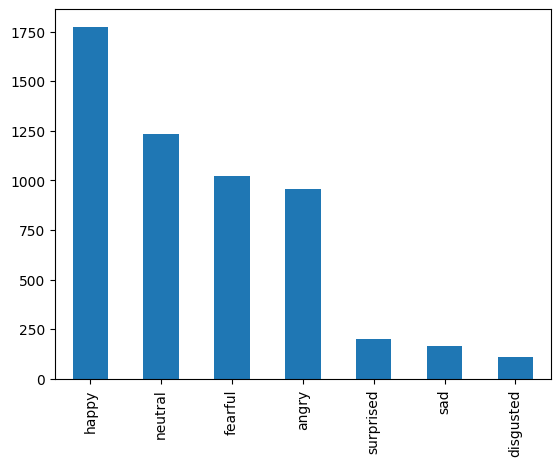

In [ ]:
test_images_csv['Emotion'].value_counts().plot(kind='bar', x='Category', y='Values')

In [ ]:
test_images_csv['Emotion'].value_counts()

happy        1774
neutral      1233
fearful      1024
angry         958
surprised     201
sad           167
disgusted     111
Name: Emotion, dtype: int64

In [ ]:
list(test_images_csv['Emotion'].unique())

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [ ]:
class_dict = {'angry':0, 'disgusted':1, 'fearful':2, 'happy':3, 'neutral':4, 'sad':5, 'surprised':6}

In [ ]:
test_images_csv['class'] = test_images_csv['Emotion'].map(class_dict)

In [ ]:
test_images_csv.sample(8)

,Emotion,Image_list,class
5191,sad,/content/drive/MyDrive/Facial Emotion/test/sad...,5
4348,neutral,/content/drive/MyDrive/Facial Emotion/test/neu...,4
1353,fearful,/content/drive/MyDrive/Facial Emotion/test/fea...,2
3165,happy,/content/drive/MyDrive/Facial Emotion/test/hap...,3
2371,happy,/content/drive/MyDrive/Facial Emotion/test/hap...,3
4495,neutral,/content/drive/MyDrive/Facial Emotion/test/neu...,4
4711,neutral,/content/drive/MyDrive/Facial Emotion/test/neu...,4
968,disgusted,/content/drive/MyDrive/Facial Emotion/test/dis...,1


In [ ]:
test_images_csv['class'].value_counts()

3    1774
4    1233
2    1024
0     958
6     201
5     167
1     111
Name: class, dtype: int64

In [ ]:
y_test = test_images_csv['class']

In [ ]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
5463    6
5464    6
5465    6
5466    6
5467    6
Name: class, Length: 5468, dtype: int64

In [ ]:
len(test_images_csv)

5468

There are 5468 facial images for the test data.

#### VISUALIZE IMAGES RANDOMLY

In [ ]:
# import necessary libraries
from PIL import Image
import cv2
import random
import matplotlib.pyplot as plt

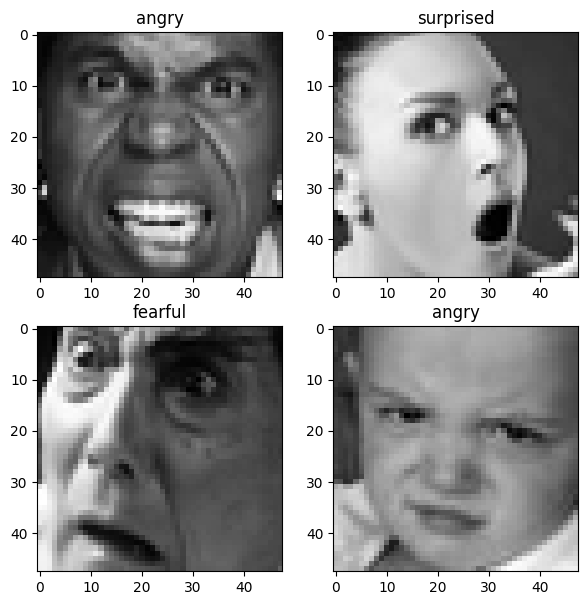

In [ ]:

plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_int = random.choice(range(len(train_images_csv)))
  image = Image.open(train_images_csv['Image_list'][random_int])
  plt.imshow(image, cmap='gray')
  plt.title(train_images_csv['Emotion'][random_int])
  plt.axis(True)

#### CONVERT IMAGES TO TENSORS

In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# convert images to tensors
def img_to_arr(img_path):
    test_arr = []
    for image in img_path:
        images = load_img(image, color_mode = 'grayscale')
        input_img = img_to_array(images)
        input_arr = np.array([input_img])
        test_arr.append(input_arr)  # Convert single image to a batch.
    return np.concatenate(test_arr, axis = 0)

In [ ]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def images_to_tensors3(root_dir, target_size=(48, 48)):
    tensors = []
    for folder in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                if file.endswith('.png'):
                    img_path = os.path.join(folder_path, file)
                    img = load_img(img_path, color_mode='grayscale', target_size=target_size)
                    img_array = img_to_array(img)
                    img_array = np.expand_dims(img_array, axis=0)
                    tensors.append(img_array)
    return np.concatenate(tensors, axis=0)

In [ ]:
# Set the root path to your directory containing subdirectories with grayscale images
#root_directory = 'path/to/your/root_directory'

train_path = '/content/drive/MyDrive/Facial Emotion/train/'
# Convert images to tensors
final_tensor = images_to_tensors(train_path, target_size=(48, 48))

# Print the shape of the final tensor
print("Shape of the final tensor:", final_tensor.shape)

IsADirectoryError: [Errno 21] Is a directory: '/'

##### TRAINING IMAGES TO TENSORS

In [ ]:
train_img_arr = img_to_arr(train_images_csv['Image_list'].to_list())

In [ ]:
train_img_arr.shape

(22455, 48, 48, 1)

In [ ]:
# import necessary libraries
import h5py
import numpy as np

# test_a is the NumPy array of image tensors

# Create an HDF5 file
with h5py.File('train_images_tensors.h5', 'w') as hf:
    # Create a dataset in the HDF5 file
    hf.create_dataset('train_images_tensors', data=train_img_arr)

##### TESTING IMAGES TO TENSORS

In [ ]:
test_list = test_images_csv['Image_list'].to_list()

In [ ]:
test_img_arr = img_to_arr(test_images_csv['Image_list'].to_list())

In [ ]:
test_img_arr.shape

(5468, 48, 48, 1)

### SAVING IMAGE TENSORS TO HDF5 FILE TO SAVING CONVERSION TIME WHEN NEXT I NEED TO WORK ON THE PROJECT.

In [ ]:
# import necessary libraries
import h5py
import numpy as np

# test_a is the NumPy array of image tensors

# Create an HDF5 file
with h5py.File('test_image_tensors.h5', 'w') as hf:
    # Create a dataset in the HDF5 file
    hf.create_dataset('test_image_tensors', data=test_a)

#### CODE TO READ THE SAVED TENSORS BACK IN

In [ ]:

import h5py
file_path = '/content/drive/MyDrive/Facial Emotion/test_image_tensors.h5'

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as hf:
    # Read the dataset
    test_img_arr = hf['test_image_tensors'][:]

In [ ]:
test_img_arr.shape

(7178, 48, 48, 1)

#### CREATE TEST AND VALIDATION DATA

In [ ]:
# import train_test_split
# test and validation data
from sklearn.model_selection import train_test_split
X_test_new, X_valid, y_test_new, y_valid = train_test_split(test_img_arr, y_test, stratify = y_test,
                                                    random_state = 20, test_size = .20)

In [ ]:
print(len(X_test_new))
len(X_valid)

4374


1094

#### RESCALE THE IMAGE TENSORS.

In [ ]:
tf.keras.layers.Rescaling(
    test_a, offset=0.0
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
flow_from_directory(directory)
zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,shear_range=0.2,

In [ ]:

# instantiate train
train_dataGen = ImageDataGenerator(rescale=1./255)

# instantiate test
test_dataGen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_path = '/content/drive/MyDrive/Facial Emotion/train'

train_set = train_dataGen.flow_from_directory(train_path,
    target_size=(48, 48),
    batch_size=128,
    class_mode='categorical', color_mode='grayscale')

Found 22455 images belonging to 7 classes.


In [ ]:
test_path = '/content/drive/MyDrive/Facial Emotion/test'

test_set = test_dataGen.flow_from_directory(test_path,
    target_size=(48, 48),
    batch_size=128,
    class_mode='categorical', color_mode='grayscale')

Found 5468 images belonging to 7 classes.


In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
model.fit(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)

In [ ]:
dense = tf.keras.layers.Dense(3, kernel_regularizer='l2')

In [ ]:
num_classes = 7

model = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer='l2'),

  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(256, activation='relu', kernel_regularizer='l2'),
  layers.Dense(num_classes, activation ='softmax')
])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 4 (<ipython-input-58-931e323b5dc8>, line 20)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs=15
history = model.fit(
  train_set, validation_data = test_set, epochs=15
)

Epoch 1/15
  7/176 [>.............................] - ETA: 1:00:16 - loss: 3.9030 - accuracy: 0.3058

KeyboardInterrupt: 

In [ ]:
input_shape=(48, 48, 1)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 48, 48, 16)        160       
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 32)        4640      
                                                                 
 dropout_2 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 64)        18496     
                                                      

In [ ]:

def loss_accuracy_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

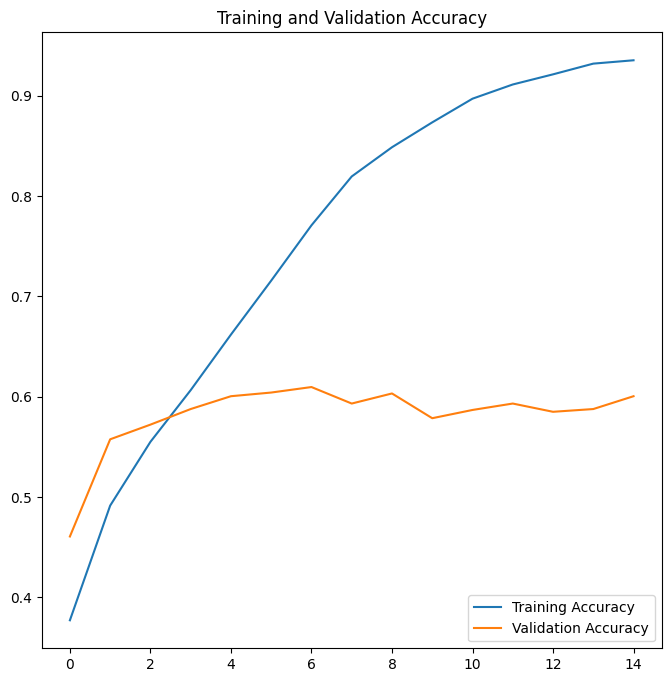

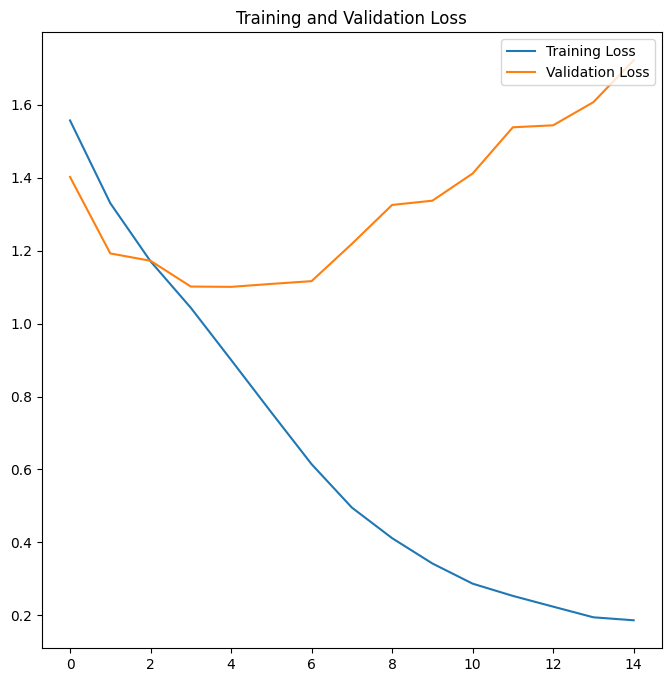

In [ ]:
loss_accuracy_curve(history)

In [ ]:


model.evaluate(X_test_new, y_test_new)

137/137 [==============================] - 1s 7ms/step - loss: 1.7666 - accuracy: 0.5752


[1.7665818929672241, 0.5752171874046326]

In [ ]:
model_pred_probs = model.predict(X_test_new)

137/137 [==============================] - 1s 3ms/step


In [ ]:
model_pred = model_pred_probs.argmax(axis = 1)
model_pred[:10]

array([0, 0, 2, 0, 0, 3, 2, 0, 2, 2])

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_true=y_test_new,
                 y_pred=model_pred)

array([[ 364,   14,  115,  138,  107,   27,    1],
       [  16,   41,   14,   11,    6,    1,    0],
       [ 143,    4,  346,  113,  167,   27,   19],
       [  91,    1,   42, 1170,  102,   10,    3],
       [ 140,    3,  102,  190,  531,   16,    4],
       [  36,    1,   25,   31,   29,   12,    0],
       [  28,    0,   35,   31,   15,    0,   52]])

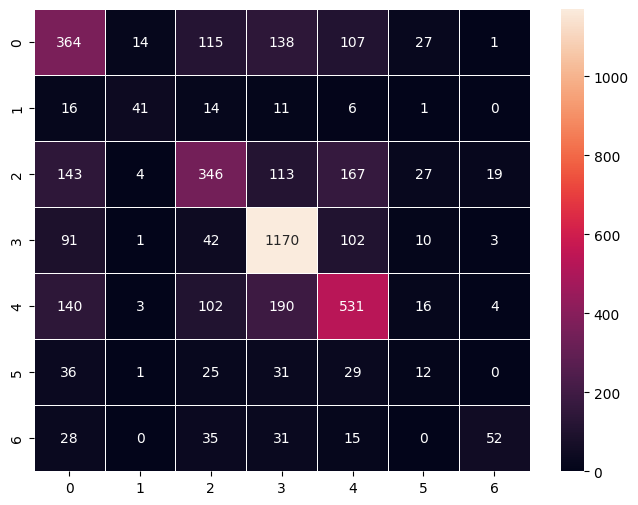

In [ ]:
# prettified confusion matrix
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_true=y_test_new,
                 y_pred=model_pred), annot = True, fmt = 'd', linewidth = 0.4)
plt.show()

In [ ]:

# recall, precision, f1-score
print(classification_report(y_true=y_test_new,
                 y_pred=model_pred))

              precision    recall  f1-score   support

           0       0.44      0.48      0.46       766
           1       0.64      0.46      0.54        89
           2       0.51      0.42      0.46       819
           3       0.69      0.82      0.75      1419
           4       0.55      0.54      0.55       986
           5       0.13      0.09      0.11       134
           6       0.66      0.32      0.43       161

    accuracy                           0.58      4374
   macro avg       0.52      0.45      0.47      4374
weighted avg       0.57      0.58      0.56      4374



In [ ]:
train_images_csv['Image_list']

In [ ]:
input_arr

array([[[[ 2.],
         [ 2.],
         [ 2.],
         ...,
         [ 1.],
         [ 2.],
         [ 1.]],

        [[ 2.],
         [ 2.],
         [ 2.],
         ...,
         [ 2.],
         [ 2.],
         [ 1.]],

        [[ 4.],
         [ 4.],
         [ 3.],
         ...,
         [ 2.],
         [ 3.],
         [ 2.]],

        ...,

        [[19.],
         [45.],
         [42.],
         ...,
         [31.],
         [32.],
         [37.]],

        [[ 4.],
         [38.],
         [44.],
         ...,
         [33.],
         [37.],
         [30.]],

        [[ 0.],
         [24.],
         [44.],
         ...,
         [31.],
         [17.],
         [14.]]]], dtype=float32)